In [180]:
from image2network.utils.utils import maskColor, returnSkeleton, getImage, drawNetwork, cameraDetection
from image2network.utils.getNetwork import extract_network
import PIL as pil
import io
import cv2
import numpy as np

In [181]:
cameras = cameraDetection()


In [182]:
color = "#dc1000"
hueDelta = 2

In [183]:
success, imgEnc, frame = getImage(camera=cameras[-1])
RGB_im = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

im1 = pil.Image.fromarray(RGB_im)

In [184]:
r, g, b = pil.ImageColor.getcolor(color, "RGB")
targetColor = np.uint8([[[b, g, r]]])
targetColor = cv2.cvtColor(targetColor, cv2.COLOR_BGR2HSV)
hue = targetColor[0][0][0]
lower_color = np.array([hue - hueDelta, 100, 100]) 
upper_color = np.array([hue + hueDelta, 255, 255])

In [185]:
hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
mask = cv2.inRange(hsv, lower_color, upper_color)  
coord = cv2.findNonZero(mask)
res = cv2.bitwise_or(frame, frame, mask=mask)

In [186]:
#cv2.bitwise_

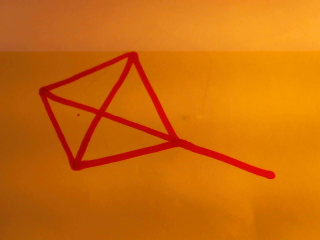

In [187]:
#maskedFrame, outmasked = maskColor(frame, f"{color}", int(hueDelta))
#RGB_im2 = cv2.cvtColor(maskedFrame, cv2.COLOR_BGR2RGB)
im2 = pil.Image.fromarray(res)

skelBuffer, skeleton, thinImg, thinned = returnSkeleton(res)

im3 = pil.Image.fromarray(skeleton)
im1

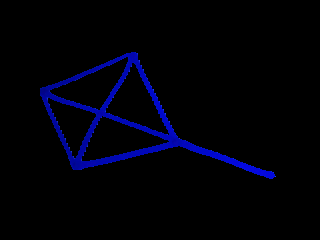

In [188]:
im2

In [189]:
im3

## Network

In [190]:
import networkx as nx

In [191]:
success, imgEnc, frame = getImage(resolution=(1920, 1080))
    
maskedFrame, _ = maskColor(frame,  f"{color}", int(hueDelta))
print(f'Network color: {color}, hue delta: {hueDelta}')
print(f'Network pixels: {maskedFrame.sum()}')

skelImg, skel, thinImg, thinned = returnSkeleton(maskedFrame)
#thinImgEnc = base64.b64encode(skelImg).decode("utf-8")
g = extract_network(skel, min_distance=50)

Network color: #dc1000, hue delta: 2
Network pixels: 786994
Skeleton px=625
Adding 1/1 dense nodes to existing 8 nodes.
Merged (94, 49) and (96, 50), d=2
Merged (95, 50) and (96, 52), d=2
Merged (112, 98) and (112, 104), d=6
Merged (112, 101) and (155, 78), d=46


In [192]:
G = nx.Graph()
for u,v,data in g.edges(data=True):
    w = data['weight'] if 'weight' in data else 1.0
    if G.has_edge(u,v):
        G[u][v]['weight'] += w
    else:
        G.add_edge(u, v, weight=w)

print(G.edges(data=True))

[((132, 90), (96, 51), {'weight': 2.0}), ((132, 90), (65, 129), {'weight': 1.0}), ((132, 90), (138, 163), {'weight': 2.0}), ((96, 51), (65, 129), {'weight': 1.0}), ((65, 129), (138, 163), {'weight': 1.0}), ((138, 163), (174, 269), {'weight': 1.0})]


In [193]:
nx.algorithms.smallworld.sigma(G)

1.0000000000000002

In [202]:
list(nx.connectivity.minimum_edge_cut(G))

[((138, 163), (174, 269))]